-[test](#test) 

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from __future__ import division

In [44]:
def TestPlot(T,I_0,sigma,SamplingFreq):
    """
    ToDo:
    - add tau as parameter
    - label x and y
    """
    T=1; dt = 1/20000.
    I = OU_current(T, I_0, sigma, 1/SamplingFreq)
    plt.plot(np.linspace(0,T,1/dt),I)
    print 'Mean Current:', I.mean(), 'mV','Standard Deviaton:' , I.std(),'mV' #okay

In [33]:
def save_stim(T, I_0, sigma, tau, sampling_freq):
    import hashlib
    
    filename = 'I_noise_I0_{}pA_sigma_{}pA.'.format(I_0,sigma)
    I = OU_current(T=T, I_0=I_0, sigma=sigma, tau=tau, sampling_freq=sampling_freq) #in pA

    #get the command voltage (convert the current in pA to mV) 
    I_mV = 1e-3*I
    
    filename += hashlib.md5(I_mV).hexdigest()
    filename += '.tpl'
    print filename
    # store the values in pA to a binary file
    (I_mV).astype('f4').tofile(filename)

In [34]:
def OU_current(T,I_0=0,sigma=1,tau=0.003, sampling_freq=20000.):
    '''
    T : gives the simulation time in seconds
    other parameters as in Pozzorini et al 2015
    '''
    DeltaT = 1/sampling_freq
    def DeltaI(I):

        return (I_0-I)*DeltaT/tau + np.sqrt(2*sigma**2*DeltaT/tau)*randn()
    
    I = np.zeros(int(T/DeltaT))
    I[0] = I_0 #set the initial value to the mean input
    
    for i in xrange(1,len(I)):
        I[i] = I[i-1]+DeltaI(I[i-1])
        
    return I


# test 

### Welcome to the Noise Stimulus Generator Notebook

The following parameters are taken as inputs:

$T$ - the length of the stimulus in seconds

$I_{0}$ - the mean input current in pA

$\sigma $ - the standard deviation of the input current in pA

$f$ - the sampling frequency in kHz

The notebook outputs:

- a plot of the noise stimulus

- a binary stimulus file



#### Please enter the input parameters below:

In [45]:
# Run this cell to save the stimulus file with given parameters


I_0 = 500 #mean input current (pA)

T = 100 #length of stimulus required (s)

sigma = 100 #standard deviation (pA)

SamplingFreq = 20000 # sampling frequency (kHz)

tau = 3 #time constant (ms)

#save_stim(T,I_0,sigma,tau,SamplingFreq)

I_noise_I0_500pA_sigma_100pA.affbcb3bf7a19b0d021fa088ce2a6bf4.tpl


Mean Current: 498.496725198 mV Standard Deviaton: 140.998173069 mV


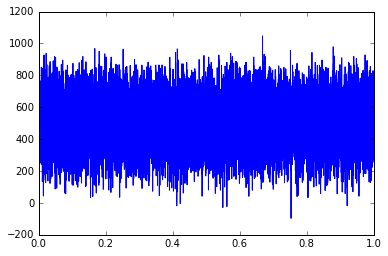

In [46]:
TestPlot(T,I_0,sigma,SamplingFreq)

Export stimulation current to TPL file (patchmaster)
>Template Files for stimulation can be used in Voltage Clamp and in Current Clamp mode. In Current Clamp
mode, the stimulation data is defined in volts, where 1 mV corresponds with 1 pA current injection.
Example: A value of 0.1 would result in a current injection of 100 pA.

In [ ]:
#test the files